# Práctica 1: Ambiente Snake y Agente Reactivo
### [Introducción a los Sistemas Inteligentes 2019-1](https://fagonzalezo.github.io/iis-2019-1/)
### Universidad Nacional de Colombia, Bogotá

---

**Fecha límite de entrega**: _Jueves 11 de Abril_ antes de la medianoche (ver instrucciones de envío al final)


Cerciórese de reiniciar y correr el notebook en su totalidad antes de enviarlo. Verifique que todas las salidas se muestran de manera correcta.

Integrantes del grupo (máximo 3):

* Samael De Jesús Salcedo Amortegui 1016099109
* German David Garcia Nieves 1026303730
* Andres Fernando Roman Arevalo 1007098201

---

Las siguientes instrucciones instalan las librerías y archivos necesarios para el notebook.

In [0]:
!rm -r snake-ai-reinforcement
!git clone https://github.com/YuriyGuts/snake-ai-reinforcement.git
!mv snake-ai-reinforcement/snakeai .
!ls


Cloning into 'snake-ai-reinforcement'...
remote: Enumerating objects: 197, done.
remote: Total 197 (delta 0), reused 0 (delta 0), pack-reused 197
Receiving objects: 100% (197/197), 42.98 KiB | 4.30 MiB/s, done.
Resolving deltas: 100% (97/97), done.
mv: cannot move 'snake-ai-reinforcement/snakeai' to './snakeai': Directory not empty
sample_data		       snake-env-20190409-235110.csv
snakeai			       snake-env-20190409-235221.csv
snake-ai-reinforcement	       snake-env-20190409-235308.csv
snake-env-20190409-221848.csv  snake-env-20190409-235423.csv
snake-env-20190409-221914.csv  snake-env-20190409-235445.csv
snake-env-20190409-222121.csv  snake-env-20190409-235509.csv
snake-env-20190409-222219.csv  snake-env-20190409-235532.csv
snake-env-20190409-222256.csv  snake-env-20190409-235549.csv
snake-env-20190409-222357.csv  snake-env-20190410-000823.csv
snake-env-20190409-222734.csv  snake-env-20190410-000853.csv
snake-env-20190409-230832.csv  snake-env-20190410-000903.csv
snake-env-20190409-23

Vamos a construir un agente que sea capaz de jugar el juego de *Snake*:

<img src="https://cloud.githubusercontent.com/assets/2750531/24808769/cc825424-1bc5-11e7-816f-7320f7bda2cf.gif" alt="Snake snapshot" width="320"/>

Para esto vamos a usar como base este [proyecto](https://github.com/YuriyGuts/snake-ai-reinforcement) desarrollado por [Yuriy Guts](https://github.com/YuriyGuts).

Primero definimos una clase que nos permite simular el juego:


In [0]:
from snakeai.gameplay.environment import Environment

class EnvironmentPO(Environment):
    """
    Partial observation environment. Same as base class environment, overloads 
    `get_observation` so that only the cells in front of the snake are returned. 
    (From Environment doc): Represents the RL environment for the Snake game that implements the game logic,
    provides rewards for the agent and keeps track of game statistics.
    """
    def __init__(self, config, verbose=0):
        super().__init__(config, verbose)

    @property
    def observation_shape(self):
        """ Get the shape of the state observed at each timestep. """
        return 3

    def get_observation(self):
        """ Observe the state of the environment. """
        if self.is_game_over:
            return (0, 0, 0)
        center = self.snake.head + self.snake.direction
        if self.snake.direction == Point(0,1):
            left = self.snake.head + Point(1,0)
            right = self.snake.head + Point(-1, 0)
            
        elif self.snake.direction == Point(0, -1):
            left = self.snake.head + Point(-1, 0)
            right = self.snake.head + Point(1, 0)
            
        elif self.snake.direction == Point(1, 0):
            left = self.snake.head + Point(0, -1)
            right = self.snake.head + Point(0, 1)
            
        else:
            left = self.snake.head + Point(0, 1)
            right = self.snake.head + Point(0, -1)
            
        return (self.field[left], self.field[center], self.field[right])
    
    def show_field(self):
        return self.field.__str__()

Esta clase extiende la clase `Environment` del proyecto `snakeai`:

```Python
class Environment(object):
    """
    Represents the RL environment for the Snake game that implements the game logic,
    provides rewards for the agent and keeps track of game statistics.
    """

    def __init__(self, config, verbose=1):
        """
        Create a new Snake RL environment.
        
        Args:
            config (dict): level configuration, typically found in JSON configs.  
            verbose (int): verbosity level:
                0 = do not write any debug information;
                1 = write a CSV file containing the statistics for every episode;
                2 = same as 1, but also write a full log file containing the state of each timestep.
        """
        self.field = Field(level_map=config['field'])
        self.snake = None
        self.fruit = None
        self.initial_snake_length = config['initial_snake_length']
        self.rewards = config['rewards']
        self.max_step_limit = config.get('max_step_limit', 1000)
        self.is_game_over = False

        self.timestep_index = 0
        self.current_action = None
        self.stats = EpisodeStatistics()
        self.verbose = verbose
        self.debug_file = None
        self.stats_file = None

    def seed(self, value):

    @property
    def observation_shape(self):
        """ Get the shape of the state observed at each timestep. """

    @property
    def num_actions(self):
        """ Get the number of actions the agent can take. """

    def new_episode(self):
        """ Reset the environment and begin a new episode. """
        
    def record_timestep_stats(self, result):
        """ Record environment statistics according to the verbosity level. """

    def get_observation(self):
        """ Observe the state of the environment. """

    def choose_action(self, action):
        """ Choose the action that will be taken at the next timestep. """

    def timestep(self):
        """ Execute the timestep and return the new observable state. """

    def generate_fruit(self, position=None):
        """ Generate a new fruit at a random unoccupied cell. """

    def has_hit_wall(self):
        """ True if the snake has hit a wall, False otherwise. """

    def has_hit_own_body(self):
        """ True if the snake has hit its own body, False otherwise. """

    def is_alive(self):
        """ True if the snake is still alive, False otherwise. """
```

Un agente para jugar Snake lo construimos extendiendo la clase `AgentBase`. El siguiente es un agente que ejecuta sus acciones al azar:

In [0]:
from snakeai.agent import AgentBase

class RandomActionAgent(AgentBase):
    """ Represents a Snake agent that takes a random action at every step. """

    def __init__(self):
        pass

    def begin_episode(self):
        pass

    def act(self, observation, reward,step):
        return random.choice(ALL_SNAKE_ACTIONS)

    def end_episode(self):
        pass

Finalmente definimos una función `play` que nos permite simular el juego:

In [0]:
from snakeai.gameplay.entities import ALL_SNAKE_ACTIONS, Point
import numpy as np
import random


def play(env, agent, num_episodes=1, verbose=1):
    """
    Play a set of episodes using the specified Snake agent.
    Use the non-interactive command-line interface and print the summary statistics afterwards.
    
    Args:
        env: an instance of Snake environment.
        agent: an instance of Snake agent.
        num_episodes (int): the number of episodes to run.
    """

    fruit_stats = []

    print()
    print('Playing:')

    for episode in range(num_episodes):
        timestep = env.new_episode()
        agent.begin_episode()
        game_over = False
        step = 0
        while not game_over:
            if verbose > 0:
                print("------ Step ", step, " ------")
                print (env.show_field())
                print ("Observation:", env.get_observation())
                print ("Head:", env.snake.head)
                print ("Direction:", env.snake.direction)
            step += 1
            action = agent.act(timestep.observation, timestep.reward,step)
            env.choose_action(action)
            timestep = env.timestep()
            game_over = timestep.is_episode_end

        fruit_stats.append(env.stats.fruits_eaten)

        summary = '******* Episode {:3d} / {:3d} | Timesteps {:4d} | Fruits {:2d}'
        print(summary.format(episode + 1, num_episodes, env.stats.timesteps_survived, env.stats.fruits_eaten))

    print()
    print('Fruits eaten {:.1f} +/- stddev {:.1f}'.format(np.mean(fruit_stats), np.std(fruit_stats)))

Ya tenemos todos los elementos necesarios para simular el juego. Arrancamos con un tablero inicial en el cual 
la serpiente está en el centro. Esto lo especificamos con un dictionario que indica la configuración, los campos 
que nos interesan son `field`, `initial_snake_length` y `max_step_limit`, los otros campo los podemo ignorar por el momento:

In [0]:
inicial = {
  "field": [
    "#######",
    "#.....#",
    "#.....#",
    "#..S..#",
    "#.....#",
    "#.....#",
    "#######"
  ],

  "initial_snake_length": 2,
  "max_step_limit": 1000,

  "rewards": {
    "timestep": -0.01,
    "ate_fruit": 1,
    "died": -1
  }
}

Veamos como se comporta el agente aleatorio con esta configuración:

In [5]:
env = EnvironmentPO(config=inicial, verbose=0)
agent = RandomActionAgent()
play(env, agent, num_episodes= 1, verbose=1)


Playing:
------ Step  0  ------
#######
#.....#
#O....#
#..S..#
#..s..#
#.....#
#######
Observation: (0, 0, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
------ Step  1  ------
#######
#.....#
#O....#
#..sS.#
#.....#
#.....#
#######
Observation: (0, 0, 0)
Head: Point(x=4, y=3)
Direction: Point(x=1, y=0)
------ Step  2  ------
#######
#.....#
#O....#
#...s.#
#...S.#
#.....#
#######
Observation: (0, 0, 0)
Head: Point(x=4, y=4)
Direction: Point(x=0, y=1)
------ Step  3  ------
#######
#.....#
#O....#
#.....#
#..Ss.#
#.....#
#######
Observation: (0, 0, 0)
Head: Point(x=3, y=4)
Direction: Point(x=-1, y=0)
------ Step  4  ------
#######
#.....#
#O....#
#..S..#
#..s..#
#.....#
#######
Observation: (0, 0, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
------ Step  5  ------
#######
#.....#
#O....#
#.Ss..#
#.....#
#.....#
#######
Observation: (0, 0, 0)
Head: Point(x=2, y=3)
Direction: Point(x=-1, y=0)
------ Step  6  ------
#######
#.....#
#OS...#
#.s...#
#.....#
#.....#
#######
O

## 1. Agente con un plan determinado

Vamos a construir un agente que partiendo del siguiente estado inicial: 


In [0]:

#######
#.....#
#.###.#
#..S..#
##.s..#
#.....#
#######


llegue al siguiente estado

In [0]:

#######
#.....#
#s###.#
#S....#
##....#
#.....#
#######


In [0]:
class PredefinedActionAgent(AgentBase):
    """ Represents a Snake agent that takes a random action at every step. """

    def __init__(self, actions):
        self.actions = actions
        self.step = 0
        pass

    def begin_episode(self):
        pass

    def act(self, observation, reward,step):
        if step <= len(self.actions):
          return self.actions[step]
        else: 
          return random.choice(ALL_SNAKE_ACTIONS)
        

    def end_episode(self):
        pass

In [8]:
inicial1 = {
  "field": [
    "#######",
    "#.....#",
    "#.###.#",
    "#..S..#",
    "##.s..#",
    "#.....#",
    "#######"
  ],

  "initial_snake_length": 2,
  "max_step_limit": 11,

  "rewards": {
    "timestep": -0.01,
    "ate_fruit": 1,
    "died": -1
  }
}
env = EnvironmentPO(config = inicial1,verbose = 1)
agent = PredefinedActionAgent([0,2,0,1,0,1,0,0,0,1,0,0])
play(env, agent, num_episodes= 1, verbose=1)


Playing:
------ Step  0  ------
#######
#....O#
#.###.#
#..S..#
##.s..#
#.....#
#######
Observation: (0, 4, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
------ Step  1  ------
#######
#....O#
#.###.#
#..sS.#
##....#
#.....#
#######
Observation: (4, 0, 0)
Head: Point(x=4, y=3)
Direction: Point(x=1, y=0)
------ Step  2  ------
#######
#....O#
#.###.#
#...sS#
##....#
#.....#
#######
Observation: (0, 4, 0)
Head: Point(x=5, y=3)
Direction: Point(x=1, y=0)
------ Step  3  ------
#######
#....O#
#.###S#
#....s#
##....#
#.....#
#######
Observation: (4, 1, 4)
Head: Point(x=5, y=2)
Direction: Point(x=0, y=-1)
------ Step  4  ------
#######
#....S#
#.###s#
#..O.s#
##....#
#.....#
#######
Observation: (0, 4, 4)
Head: Point(x=5, y=1)
Direction: Point(x=0, y=-1)
------ Step  5  ------
#######
#...Ss#
#.###s#
#..O..#
##....#
#.....#
#######
Observation: (4, 0, 4)
Head: Point(x=4, y=1)
Direction: Point(x=-1, y=0)
------ Step  6  ------
#######
#..Sss#
#.###.#
#..O..#
##....#
#.....#
#######
O

## 2. Agente reactivo

La idea es construir un agente reactivo, es decir que sus acciones solo dependen de la observación en un momento dado y 
no tiene memoria. El agente debe procurar no estrellarse y come cuantas frutas pueda. Compare el comportamiento de este agente con el del agente
al azar. Simule cada agente por 100 episodios. Presente los resultados y discútalos.



In [0]:
class ReactiveAgent(AgentBase):
    """ 
    Represents a reactive Snake agent that dcides an action exclusively based on
    the current observation.
    """

    def __init__(self):
        pass

    def begin_episode(self):
        pass

    def act(self, observation, reward,step):
        
        if observation[0] == 4 or observation[0] == 3:
          if observation[1] == 4 or observation[1] == 3:   
            return 2
          elif observation[1] == 1 :
            return 0
          elif observation[2] == 1 :
            return 2  
        
        elif observation[0] == 1 :
          return 1
        
        else:
          if observation[1] == 4 or observation[1] == 3:   
            if observation[2] != 4 or observation[2] != 3:   
              return 1
          
          elif observation[1] == 1 :
            return 0
          
          else:
            if observation[2] == 4 or observation[2] == 3:   
              if observation[0] == 1:
                return 1
              elif observation[1] == 1:
                return 0
              else:
                return random.choice([0,1])    
            
            elif observation[2] == 1 :
              return 2
            
            else:
              return random.choice([0,1,2])

    def end_episode(self):
        pass

In [10]:
inicial1 = {
  "field": [
    "#######",
    "#.....#",
    "#.###.#",
    "#..S..#",
    "##.s..#",
    "#.....#",
    "#######"
  ],

  "initial_snake_length": 2,
  "max_step_limit": 110,

  "rewards": {
    "timestep": -0.01,
    "ate_fruit": 1,
    "died": -1
  }
}

env = EnvironmentPO(config = inicial1,verbose = 1)
agent =  ReactiveAgent()
play(env, agent, num_episodes= 100, verbose=1)


Playing:
------ Step  0  ------
#######
#....O#
#.###.#
#..S..#
##.s..#
#.....#
#######
Observation: (0, 4, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
------ Step  1  ------
#######
#....O#
#.###.#
#.Ss..#
##....#
#.....#
#######
Observation: (0, 0, 4)
Head: Point(x=2, y=3)
Direction: Point(x=-1, y=0)
------ Step  2  ------
#######
#....O#
#.###.#
#.s...#
##S...#
#.....#
#######
Observation: (0, 0, 4)
Head: Point(x=2, y=4)
Direction: Point(x=0, y=1)
------ Step  3  ------
#######
#....O#
#.###.#
#.....#
##s...#
#.S...#
#######
Observation: (0, 4, 0)
Head: Point(x=2, y=5)
Direction: Point(x=0, y=1)
------ Step  4  ------
#######
#....O#
#.###.#
#.....#
##....#
#.sS..#
#######
Observation: (0, 0, 4)
Head: Point(x=3, y=5)
Direction: Point(x=1, y=0)
------ Step  5  ------
#######
#....O#
#.###.#
#.....#
##.S..#
#..s..#
#######
Observation: (0, 0, 0)
Head: Point(x=3, y=4)
Direction: Point(x=0, y=-1)
------ Step  6  ------
#######
#....O#
#.###.#
#.....#
##.sS.#
#.....#
#######
Ob

# Random

In [0]:
from snakeai.agent import AgentBase

class RandomActionAgent(AgentBase):
    """ Represents a Snake agent that takes a random action at every step. """

    def __init__(self):
        pass

    def begin_episode(self):
        pass

    def act(self, observation, reward,steps):
        return random.choice(ALL_SNAKE_ACTIONS)

    def end_episode(self):
      pass

In [12]:
inicial1 = {
  "field": [
    "#######",
    "#.....#",
    "#.###.#",
    "#..S..#",
    "##.s..#",
    "#.....#",
    "#######"
  ],

  "initial_snake_length": 2,
  "max_step_limit": 100,

  "rewards": {
    "timestep": -0.01,
    "ate_fruit": 1,
    "died": -1
  }
}

env = EnvironmentPO(config=inicial1, verbose=1)
agent = RandomActionAgent()
play(env, agent, num_episodes= 100, verbose=1)


Playing:
------ Step  0  ------
#######
#.....#
#.###.#
#..S..#
##Os..#
#.....#
#######
Observation: (0, 4, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
******* Episode   1 / 100 | Timesteps    1 | Fruits  0
------ Step  0  ------
#######
#.....#
#.###.#
#..S..#
##.s..#
#..O..#
#######
Observation: (0, 4, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
******* Episode   2 / 100 | Timesteps    1 | Fruits  0
------ Step  0  ------
#######
#.....#
#.###.#
#O.S..#
##.s..#
#.....#
#######
Observation: (0, 4, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
******* Episode   3 / 100 | Timesteps    1 | Fruits  0
------ Step  0  ------
#######
#O....#
#.###.#
#..S..#
##.s..#
#.....#
#######
Observation: (0, 4, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
******* Episode   4 / 100 | Timesteps    1 | Fruits  0
------ Step  0  ------
#######
#.....#
#.###.#
#.OS..#
##.s..#
#.....#
#######
Observation: (1, 4, 0)
Head: Point(x=3, y=3)
Direction: Point(x=0, y=-1)
------ Ste

# Comparacion
En la graficas presentadas a continuacion se evidencia la gran diferencia que hay entre el agente reactivo y el agente con comportamiento aleatorio.

# Grafica Agente Reactivo
Frutas Comidas vs Numero de veces que sobrevivio

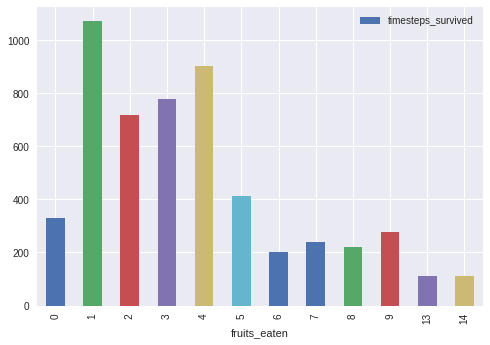

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reactive = pd.read_csv('snake-env-20190412-032413.csv')
rdf = pd.DataFrame(Reactive)
rdf.groupby('fruits_eaten')['timesteps_survived'].sum().plot(kind='bar',legend='Reverse')

#Grafica Agente con comportamiento aleatorio
Frutas Comidas vs Numero de veces que sobrevivio

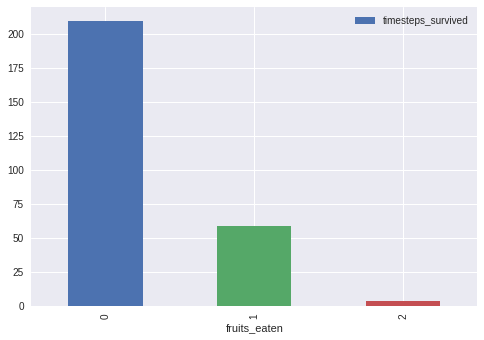

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

Random = pd.read_csv('snake-env-20190412-032454.csv')
rnf = pd.DataFrame(Random)
rnf.groupby('fruits_eaten')['timesteps_survived'].sum().plot(kind='bar',legend='Reverse')

##Gracias a las graficas podemos concluir que el agente reactivo sobrevive mucho mas tiempo y come muchas mas frutas que el agente con comportamiento aleatorio

**Instrucciones de envío:**

Este notebook debe enviarse a través del siguiente [File Request](https://www.dropbox.com/request/bV2dQzsofDXCEHYP9HvX) antes de la medianoche de la fecha límite. El archivo debe nombrarse como  isi-practica1-unalusername1-unalusername2-unalusername3.ipynb, donde unalusername es el nombre de usuario asignado por la universidad (incluya los nombres de usuario de todos los miembros del grupo).